绘制intra-consistency，inter-consistency的ablation study结果
2行3列的子图，行表示mask pattern，列表示metric，每个子图有3组，组别代表数据集，每组有4个柱子（original，wointra，wointer，woall）

meta NOT subset; don't know how to subset; dropped


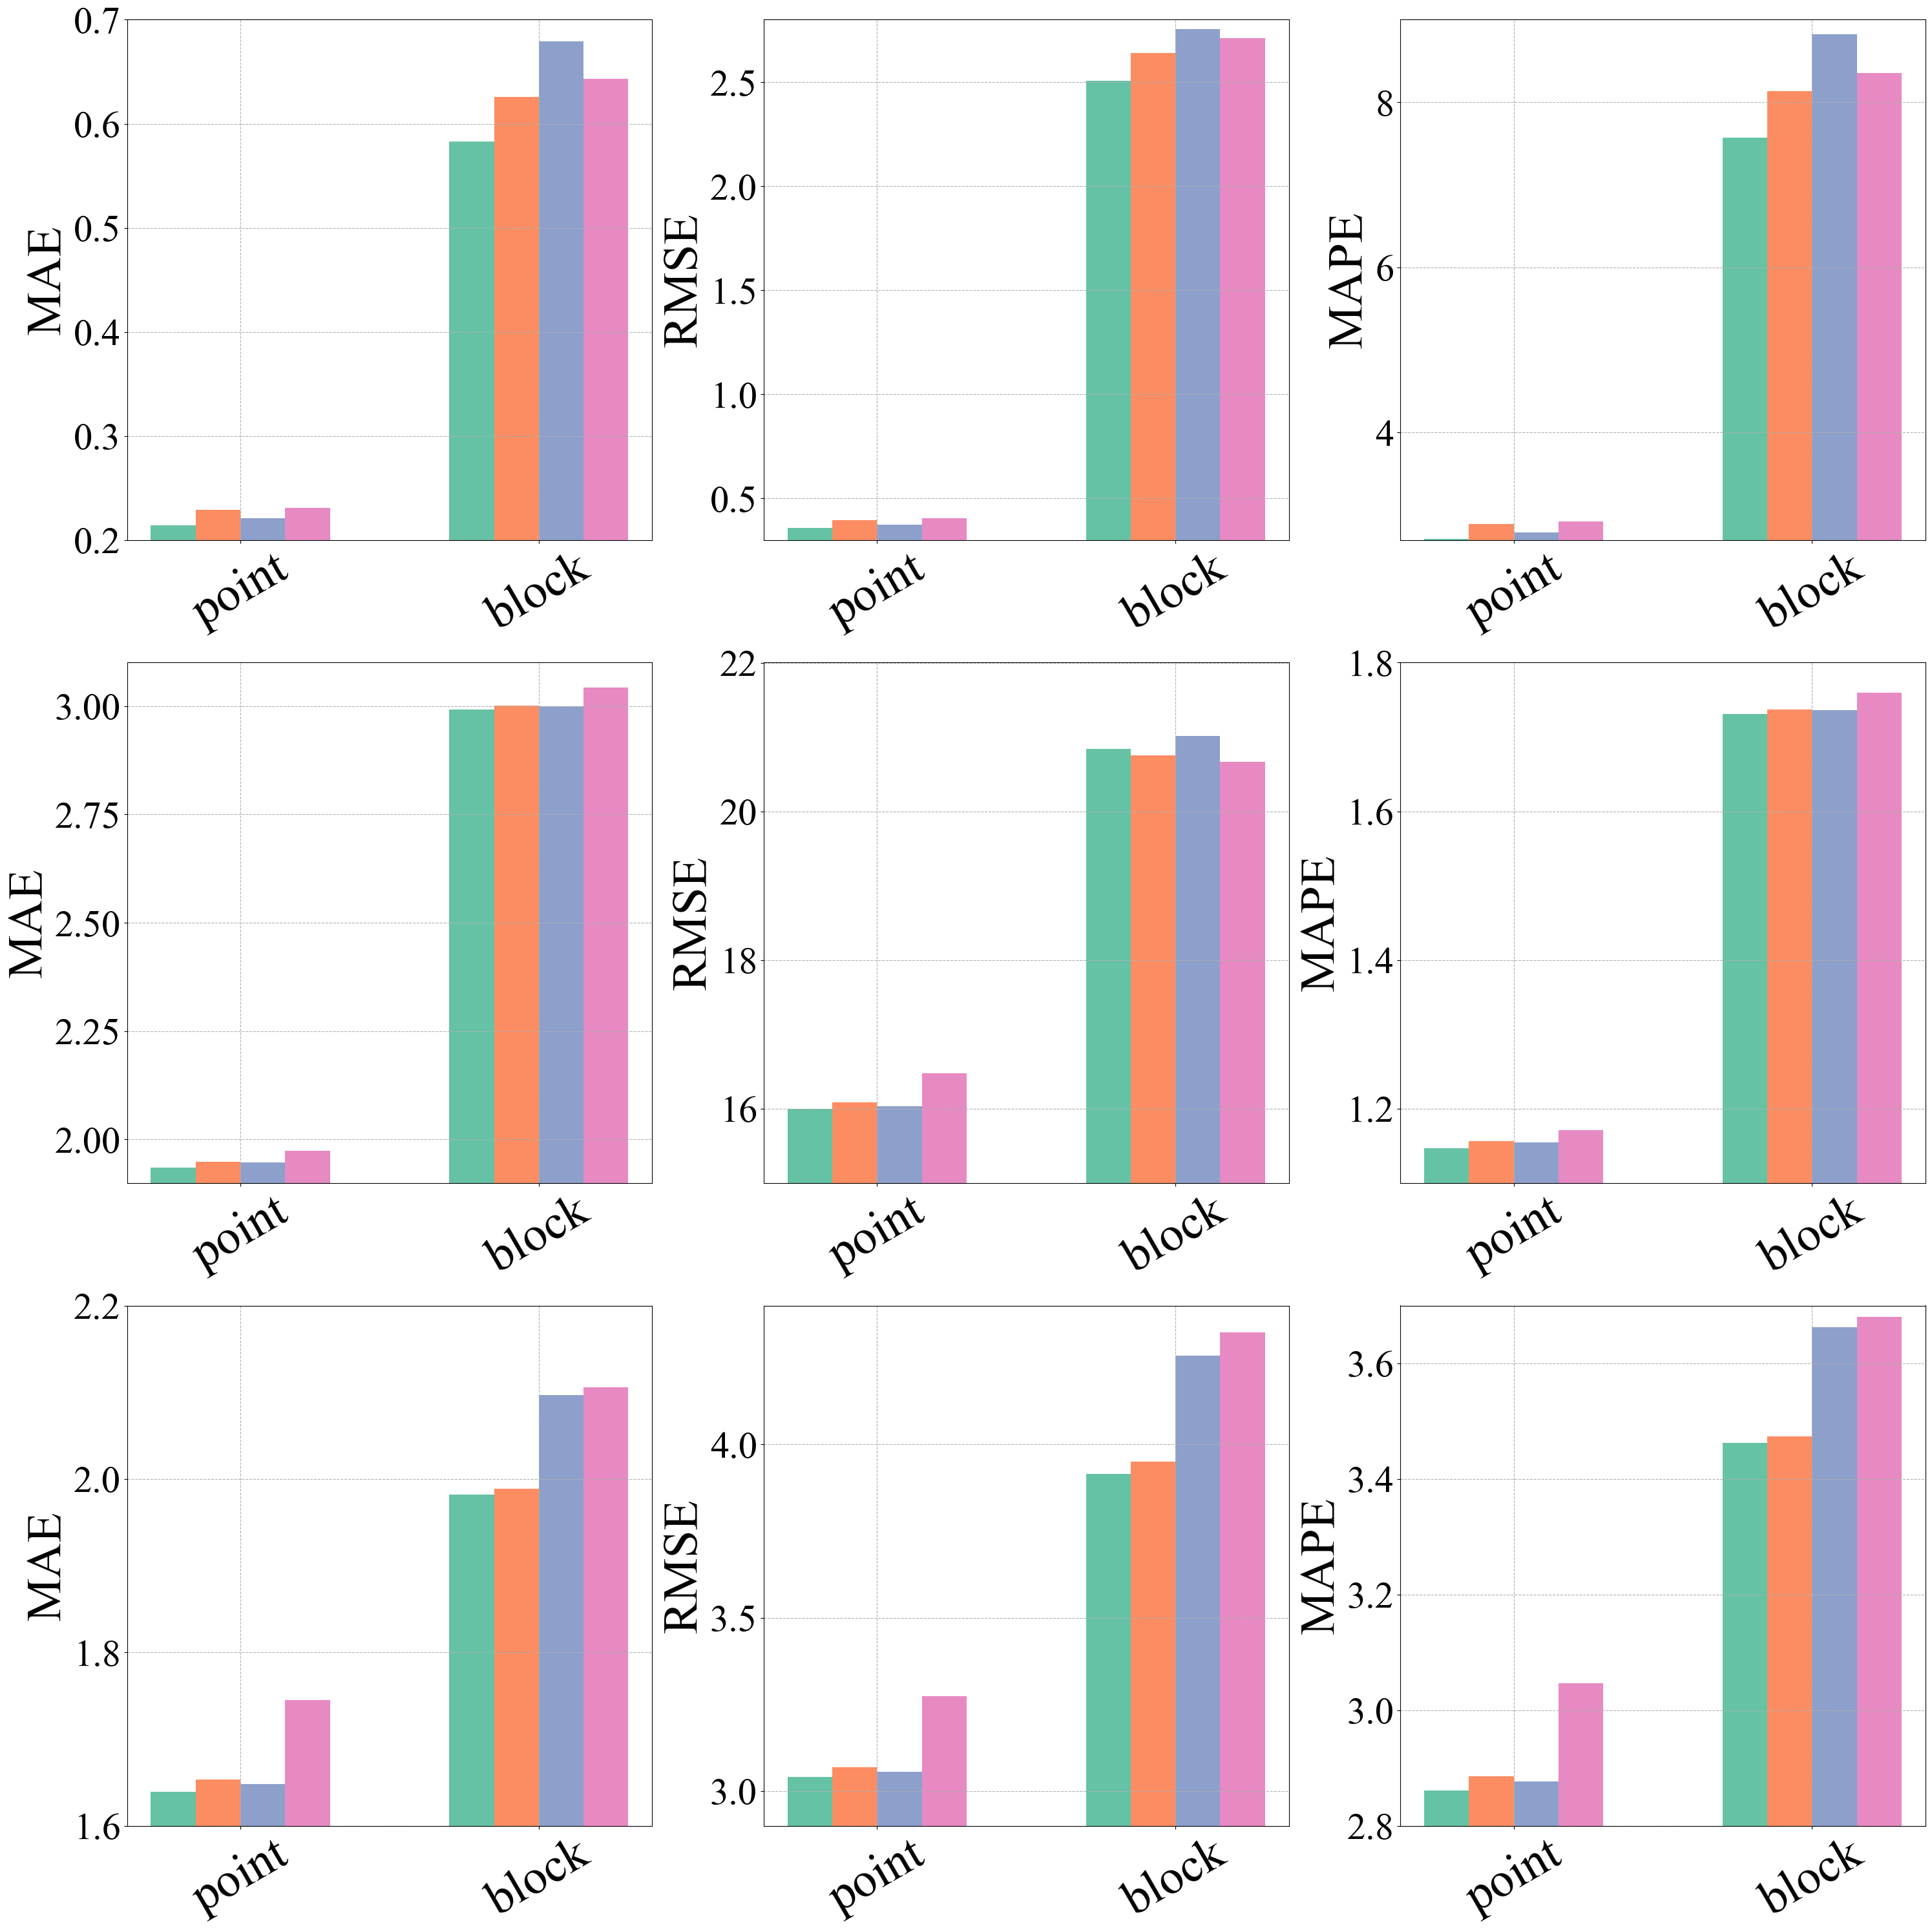

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# results
ETTm1_maes={'MTSCI': [0.214,0.583], 'w/o intra': [0.229,0.626],'w/o inter': [0.221,0.679],'w/o cons': [0.231,0.643]}
ETTm1_rmses={'MTSCI': [0.358,2.507], 'w/o intra': [0.395,2.640],'w/o inter': [0.372,2.755],'w/o cons': [0.404,2.711]}
ETTm1_mapes={'MTSCI': [2.711,7.575], 'w/o intra': [2.894,8.138],'w/o inter': [2.787,8.822],'w/o cons': [2.920,8.355]}

Weather_maes={'MTSCI': [1.935,2.992], 'w/o intra': [1.949,3.001],'w/o inter': [1.947,3.000],'w/o cons': [1.974,3.042]}
Weather_rmses={'MTSCI': [15.992,20.836], 'w/o intra': [16.085,20.753],'w/o inter': [16.028,21.010],'w/o cons': [16.473,20.669]}
Weather_mapes={'MTSCI': [1.147,1.731], 'w/o intra': [1.156,1.737],'w/o inter': [1.154,1.736],'w/o cons': [1.171,1.760]}

METRLA_maes={'MTSCI': [1.639,1.982], 'w/o intra': [1.653,1.989],'w/o inter': [1.648,2.097],'w/o cons': [1.745,2.106]}
METRLA_rmses={'MTSCI': [3.040,3.914], 'w/o intra': [3.068,3.950],'w/o inter': [3.056,4.256],'w/o cons': [3.273,4.323]}
METRLA_mapes={'MTSCI': [2.861,3.462], 'w/o intra': [2.886,3.474],'w/o inter': [2.877,3.663],'w/o cons': [3.047,3.680]}

mask_patterns = ("point","block")

fig, ax = plt.subplots(3,3,figsize=(30,30))
ax[0][0].tick_params(axis='x', labelsize=42)
ax[0][0].tick_params(axis='y', labelsize=42)
ax[0][1].tick_params(axis='x', labelsize=42)
ax[0][1].tick_params(axis='y', labelsize=42)
ax[0][2].tick_params(axis='x', labelsize=42)
ax[0][2].tick_params(axis='y', labelsize=42)
ax[1][0].tick_params(axis='x', labelsize=42)
ax[1][0].tick_params(axis='y', labelsize=42)
ax[1][1].tick_params(axis='x', labelsize=42)
ax[1][1].tick_params(axis='y', labelsize=42)
ax[1][2].tick_params(axis='x', labelsize=42)
ax[1][2].tick_params(axis='y', labelsize=42)
ax[2][0].tick_params(axis='x', labelsize=42)
ax[2][0].tick_params(axis='y', labelsize=42)
ax[2][1].tick_params(axis='x', labelsize=42)
ax[2][1].tick_params(axis='y', labelsize=42)
ax[2][2].tick_params(axis='x', labelsize=42)
ax[2][2].tick_params(axis='y', labelsize=42)

colors=sns.color_palette("Set3")

# colors=['#FF9B9B','#FFD6A5','#FF52A2','#CBFFA9','#78C1F3']


x = np.arange(len(mask_patterns))  # the label locations
width = 0.15  # the width of the bars

## ETTm1
### MAE on ETTm1
i=0
multiplier = -0.5
for attribute, metric in ETTm1_maes.items():
    offset = width * multiplier
    rects = ax[0][0].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[0].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[0][0].set_ylabel('MAE',fontsize=55)
ax[0][0].set_xticks(x + width, mask_patterns ,fontsize=55,rotation=30)
# ax[0][0].legend(fontsize=40, edgecolor='black')
ax[0][0].set_ylim(0.2, 0.7)
ax[0][0].grid(linestyle='dashed')

### RMSE on ETTm1
i=0
multiplier = -0.5
for attribute, metric in ETTm1_rmses.items():
    offset = width * multiplier
    rects = ax[0][1].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[1].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[0][1].set_ylabel('RMSE',fontsize=55)
ax[0][1].set_xticks(x + width, mask_patterns,fontsize=55,rotation=30)
# ax[0][1].legend(fontsize=40, edgecolor='black')
ax[0][1].set_ylim(0.3, 2.8)
ax[0][1].grid(linestyle='dashed')

### MAPE on ETTm1
i=0
multiplier = -0.5
for attribute, metric in ETTm1_mapes.items():
    offset = width * multiplier
    rects = ax[0][2].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[1].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[0][2].set_ylabel('MAPE',fontsize=55)
ax[0][2].set_xticks(x + width, mask_patterns,fontsize=55,rotation=30)
# ax[0][2].legend(fontsize=40, edgecolor='black')
ax[0][2].set_ylim(2.7, 9)
ax[0][2].grid(linestyle='dashed')

## Weather
### MAE on Weather
i=0
multiplier = -0.5
for attribute, metric in Weather_maes.items():
    offset = width * multiplier
    rects = ax[1][0].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[0].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[1][0].set_ylabel('MAE',fontsize=55)
ax[1][0].set_xticks(x + width, mask_patterns ,fontsize=55,rotation=30)
# ax[1][0].legend(fontsize=40, edgecolor='black')
ax[1][0].set_ylim(1.9, 3.1)
ax[1][0].grid(linestyle='dashed')

### RMSE on Weather
i=0
multiplier = -0.5
for attribute, metric in Weather_rmses.items():
    offset = width * multiplier
    rects = ax[1][1].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[1].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[1][1].set_ylabel('RMSE',fontsize=55)
ax[1][1].set_xticks(x + width, mask_patterns,fontsize=55,rotation=30)
# ax[1][1].legend(fontsize=40, edgecolor='black')
ax[1][1].set_ylim(15, 22)
ax[1][1].grid(linestyle='dashed')

### MAPE on Weather
i=0
multiplier = -0.5
for attribute, metric in Weather_mapes.items():
    offset = width * multiplier
    rects = ax[1][2].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[1].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[1][2].set_ylabel('MAPE',fontsize=55)
ax[1][2].set_xticks(x + width, mask_patterns,fontsize=55,rotation=30)
# ax[1][2].legend(fontsize=40, edgecolor='black')
ax[1][2].set_ylim(1.1, 1.8)
ax[1][2].grid(linestyle='dashed')


## METRLA
### MAE on METRLA
i=0
multiplier = -0.5
for attribute, metric in METRLA_maes.items():
    offset = width * multiplier
    rects = ax[2][0].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[0].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[2][0].set_ylabel('MAE',fontsize=55)
ax[2][0].set_xticks(x + width, mask_patterns ,fontsize=55,rotation=30)
# ax[2][0].legend(fontsize=40, edgecolor='black')
ax[2][0].set_ylim(1.6, 2.2)
ax[2][0].grid(linestyle='dashed')

### RMSE on METRLA
i=0
multiplier = -0.5
for attribute, metric in METRLA_rmses.items():
    offset = width * multiplier
    rects = ax[2][1].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[1].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[2][1].set_ylabel('RMSE',fontsize=55)
ax[2][1].set_xticks(x + width, mask_patterns,fontsize=55,rotation=30)
# ax[2][1].legend(fontsize=40, edgecolor='black')
ax[2][1].set_ylim(2.9, 4.4)
ax[2][1].grid(linestyle='dashed')

### MAPE on METRLA
i=0
multiplier = -0.5
for attribute, metric in METRLA_mapes.items():
    offset = width * multiplier
    rects = ax[2][2].bar(x + offset, metric, width, label=attribute,color=sns.color_palette("Set2")[i])
    # rects = ax[1].bar(x + offset, metric, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    i+=1
ax[2][2].set_ylabel('MAPE',fontsize=55)
ax[2][2].set_xticks(x + width, mask_patterns,fontsize=55,rotation=30)
# ax[2][2].legend(fontsize=40, edgecolor='black')
ax[2][2].set_ylim(2.8, 3.7)
ax[2][2].grid(linestyle='dashed')


plt.tight_layout()
# plt.legend(loc='upper center', ncols=3, fontsize=55, bbox_to_anchor=(0, 1.45), edgecolor='black')
plt.savefig('../img/ablation_study.pdf',dpi=300,bbox_inches='tight')
plt.show()